#1. Mount Drive

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
!ls -al '/gdrive/My Drive/data'

total 2172697
-rw------- 1 root root    337847 Jul 16 07:36 data_202001.csv
-rw------- 1 root root    314682 Jul 16 07:43 data_202002.csv
-rw------- 1 root root    335953 Jul 16 07:56 data_202003.csv
-rw------- 1 root root    988308 Jul 26 07:51 data_2020_1_12.csv
-rw------- 1 root root    988308 Jul 16 08:03 data_2020.csv
-rw------- 1 root root 783889122 Jul 15 09:11 TCS_영업소간통행시간_1시간_1개월_202001
-rw------- 1 root root 699429059 Jul 15 09:15 TCS_영업소간통행시간_1시간_1개월_202002
-rw------- 1 root root 738556069 Jul 15 09:19 TCS_영업소간통행시간_1시간_1개월_202003


#2. Korean Characters

In [29]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


런타임 - 런타임 다시 시작

matplotlib의 폰트를 Nanum 폰트로 지정

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [31]:
plt.rc('font', family='NanumBarunGothic')

#3. Load Fata

In [32]:
import pandas as pd

In [33]:
file = '/gdrive/My Drive/data/data_2020.csv'
data = pd.read_csv(file)

In [34]:
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2


In [35]:
#101,서울 105,기흥 110,목천 115,대전 120,황간 125,남구미 130,동김천 135,경주 140,부산
#101,서울(406.94) 105,기흥(387.19) 110,목천(329.91) 115,대전(271.94) 120,황간(222.38) 125,남구미(167.25) 130,동김천(192.00) 135,경주(68.26) 140,부산(0)
# Distance from Seoul : 0, 19.75, 77.03, 135, 184.56, 214.94, 239.69, 338.68, 406.94
# Distance from Seoul : 0, 20, 77, 135, 185, 240, 215, 339, 407
data['도착영업소코드'] = data['도착영업소코드'].map({105: 20, 110: 77, 115: 135, 120: 185, 125: 240, 130: 215, 135: 339, 140: 407})

In [36]:
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,20,637,2
1,20200101,4,101,20,773,2
2,20200101,4,101,20,762,2
3,20200101,4,101,20,746,2
4,20200101,4,101,20,875,2


In [37]:
data.rename(columns={'도착영업소코드': '거리'}, inplace=True)

In [38]:
data.head()

,집계일자,집계시,출발영업소코드,거리,통행시간,요일
0,20200101,4,101,20,637,2
1,20200101,4,101,20,773,2
2,20200101,4,101,20,762,2
3,20200101,4,101,20,746,2
4,20200101,4,101,20,875,2


In [39]:
data.tail()

,집계일자,집계시,출발영업소코드,거리,통행시간,요일
152865,20201231,3,101,215,8806,3
152866,20201231,5,101,215,8733,3
152867,20201231,6,101,77,3173,3
152868,20201231,13,101,77,3866,3
152869,20201231,5,101,339,12340,3


In [40]:
data_destination = data[data['거리'].isin([407])]

In [41]:
data_destination

,집계일자,집계시,출발영업소코드,거리,통행시간,요일
292,20200101,6,101,407,15824,2
293,20200101,6,101,407,19623,2
294,20200101,9,101,407,18048,2
295,20200101,17,101,407,17979,2
296,20200101,11,101,407,17349,2
...,...,...,...,...,...,...
152713,20201231,9,101,407,14460,3
152856,20201231,16,101,407,14947,3
152857,20201231,17,101,407,15328,3
152861,20201231,20,101,407,17001,3


In [42]:
data_time = data_destination.groupby(['집계시','요일','거리'])['통행시간'].mean()

In [43]:
data_time

집계시  요일  거리 
0    0   407    15549.675676
     1   407    15983.102564
     2   407    15129.750000
     3   407    14533.189189
     4   407    15908.275000
                    ...     
23   2   407    16006.125000
     3   407    16118.288889
     4   407    17035.450980
     5   407    16033.622222
     6   407    15297.022727
Name: 통행시간, Length: 168, dtype: float64

In [44]:
data_distance = data_time.unstack(level=-1)

In [45]:
data_distance

거리               407
집계시 요일              
0   0   15549.675676
    1   15983.102564
    2   15129.750000
    3   14533.189189
    4   15908.275000
...              ...
23  2   16006.125000
    3   16118.288889
    4   17035.450980
    5   16033.622222
    6   15297.022727

[168 rows x 1 columns]

In [46]:
data_distance.dropna()

거리               407
집계시 요일              
0   0   15549.675676
    1   15983.102564
    2   15129.750000
    3   14533.189189
    4   15908.275000
...              ...
23  2   16006.125000
    3   16118.288889
    4   17035.450980
    5   16033.622222
    6   15297.022727

[168 rows x 1 columns]

In [47]:
data_out = data_distance.reset_index()

In [48]:
data_out

거리,집계시,요일,407
0,0,0,15549.675676
1,0,1,15983.102564
2,0,2,15129.750000
3,0,3,14533.189189
4,0,4,15908.275000
...,...,...,...
163,23,2,16006.125000
164,23,3,16118.288889
165,23,4,17035.450980
166,23,5,16033.622222


In [49]:
# Dataframe to List
data_list = data_out.values.tolist()

In [50]:
data_list[:5]

[[0.0, 0.0, 15549.675675675675],
 [0.0, 1.0, 15983.102564102564],
 [0.0, 2.0, 15129.75],
 [0.0, 3.0, 14533.18918918919],
 [0.0, 4.0, 15908.275]]

In [51]:
# Train Dataset
x_train = [ r[:2] for r in data_list ]
y_train = [ [r[-1]] for r in data_list ]

#3. SHow Graph

In [52]:
x_train[:5], y_train[:5]

([[0.0, 0.0], [0.0, 1.0], [0.0, 2.0], [0.0, 3.0], [0.0, 4.0]],
 [[15549.675675675675],
  [15983.102564102564],
  [15129.75],
  [14533.18918918919],
  [15908.275]])

In [53]:
x1 = [ r[0] for r in data_list ]
x2 = [ r[1] for r in data_list ]
y  = [ r[-1] for r in data_list ]

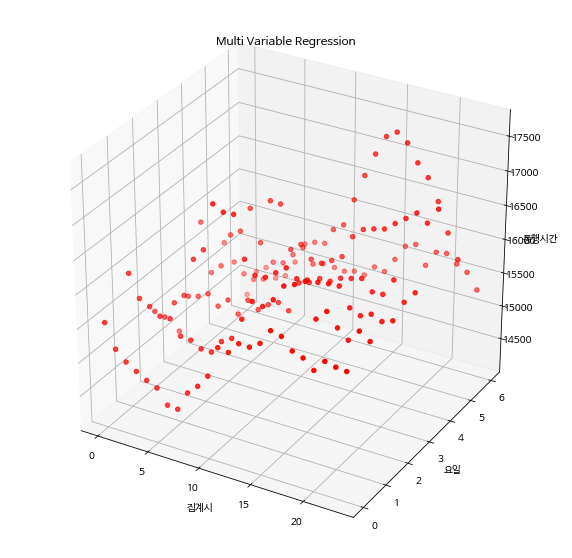

In [54]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_title("Multi Variable Regression")
ax.set_xlabel('집계시')
ax.set_ylabel('요일')
ax.set_zlabel('통행시간')
plot = ax.scatter3D(x1, x2, y, c='r')
plt.show()

#4. multi Variable using Tensorflow

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
learning_rate = 1e-4
learning_epochs = 5000

In [ ]:
# Stochastic gradient descent (SGD) Optimizer
sgd =  tf.keras.optimizers.SGD(learning_rate=learning_rate)
# Mean Square Error (MSE) loss function
mse = tf.keras.losses.mean_squared_error

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(2,)))

model.compile(loss=mse, optimizer=sgd)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=learning_epochs)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 2501/5000
6/6 [==============================] - 0s 2ms/step - loss: 14876791.0000
Epoch 2502/5000
6/6 [==============================] - 0s 2ms/step - loss: 15156120.0000
Epoch 2503/5000
6/6 [==============================] - 0s 2ms/step - loss: 14122452.0000
Epoch 2504/5000
6/6 [==============================] - 0s 3ms/step - loss: 15040569.1429
Epoch 2505/5000
6/6 [==============================] - 0s 2ms/step - loss: 14956492.4286
Epoch 2506/5000
6/6 [==============================] - 0s 2ms/step - loss: 14913280.8571
Epoch 2507/5000
6/6 [==============================] - 0s 2ms/step - loss: 15585729.2857
Epoch 2508/5000
6/6 [==============================] - 0s 2ms/step - loss: 13490845.1429
Epoch 2509/5000
6/6 [==============================] - 0s 3ms/step - loss: 14293121.0000
Epoch 2510/5000
6/6 [==============================] - 0s 2ms/step - loss: 13547423.8571
Epoch 2511/5000
6/6 [==============================] - 0s 4ms/step - loss:

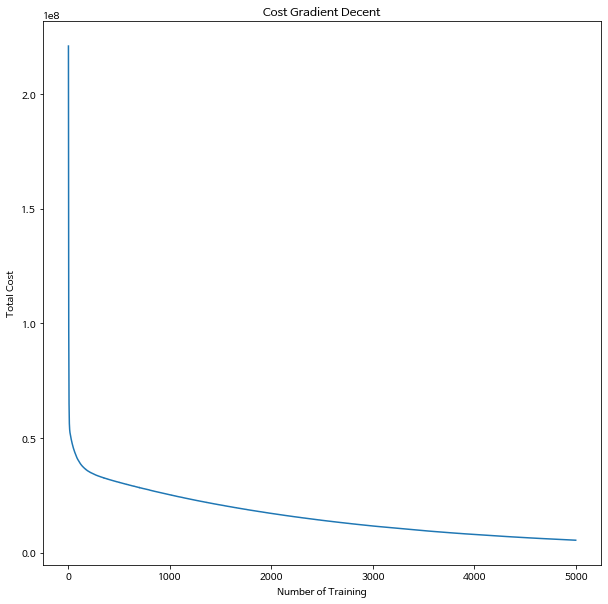

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.title('Cost Gradient Decent')
plt.ylabel('Total Cost')
plt.xlabel('Number of Training')
plt.show()

In [ ]:
print("%20s %20s " % ('Step', 'Cost')+'\n')
for step in range(learning_epochs):
    if step % 100 == 0:
        cost_val = history.history['loss'][step]
        print("%20i %20.5f" %(step, cost_val))

                Step                 Cost 

                   0      220989728.00000
                 100       40088564.00000
                 200       35436220.00000
                 300       33406050.00000
                 400       31959286.00000
                 500       30700760.00000
                 600       29520308.00000
                 700       28450442.00000
                 800       27337176.00000
                 900       26280576.00000
                1000       25283372.00000
                1100       24325204.00000
                1200       23396082.00000
                1300       22512308.00000
                1400       21642076.00000
                1500       20849608.00000
                1600       20040246.00000
                1700       19273696.00000
                1800       18568740.00000
                1900       17837788.00000
                2000       17169408.00000
                2100       16523395.00000
                2200       15892

In [ ]:
Time = 14 #@param {type:"slider", min:0, max:23, step:1}
Day  = 3 #@param {type:"slider", min:0, max:6, step:1}

In [ ]:
time_condition = data_out['집계시'] == Time
day_condition = data_out['요일'] == Day
data_out[time_condition & day_condition]

거리,집계시,요일,407
101,14,3,15936.189655


In [ ]:
input = [ Time, Day ]
time = model.predict([input])
ml_time = time[0][0]
week_days = ['월', '화', '수', '목', '금', '토', '일']
print("%10s %10s %50s" % ('집계시', '요일', '서울에서 부산까지 통행시간')+'\n')
print("%10s %10s %50s" % ( str(Time), week_days[Day], str(ml_time)))

       집계시         요일                                     서울에서 부산까지 통행시간

        14          목                                          15570.834
